In [0]:
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
import pandas as pd

sns.set()

In [0]:
def predict(x, w, b):
  return np.matmul(x, w) + b

def loss(y_star, y):
  return np.sum(np.power(y_star - y, 2)) * (1/y.shape[0])

def update_wb(prediction, x, y, w, b, learning_rate=0.001):
  w_star = w - (1/y.shape[0]) * x.T.dot(prediction - y) * learning_rate

  b_star = b - (1/y.shape[0]) * np.sum(prediction-y) * learning_rate
  
  return w_star, b_star

In [0]:
columns = ['Size', 'School Distance(km)', 'Old(year)', 'Room', 'Bathroom', 'Price']
house_price = [[76, 0.732, 20, 3, 1, 37000],
                [108, 0.732, 20, 3, 2, 47000],
                [172, 0.732, 20, 4, 2, 55000],
                [150, 0.544, 9, 4, 2, 52000],
                [160, 0.544, 9, 4, 2, 58500],
                [184, 0.544, 9, 4, 3, 55500],
                [75, 0.541, 9, 3, 1, 36000],
                [101, 0.541, 9, 3, 2, 40000],
                [20, 0.1000, 7, 1, 1, 12000],
                [23, 0.1000, 7, 1, 1, 14000],
                [84, 0.886, 15, 3, 2, 37000],
                [219, 0.283, 10, 4, 2, 114000]]

house_price = pd.DataFrame(house_price, columns=columns)

x = house_price[columns[:-1]].values
y = house_price[columns[-1]].values

w = np.random.randn(x.shape[1])
b = np.random.randn()


In [76]:
learning_rate = 0.0001
w_list = []
b_list = []
loss_list = []

for i in range(20):
  prediction = predict(x,w,b)

  loss_value = loss(prediction, y)

  loss_list.append(loss_value)
  w_list.append(w)
  b_list.append(b)

  w, b = update_wb(prediction, x, y, w, b, learning_rate=learning_rate)

loss_list = np.array(loss_list)
w_list = np.array(w_list)
b_list = np.array(b_list)

print(np.sqrt(loss_value))

10981.12678435063


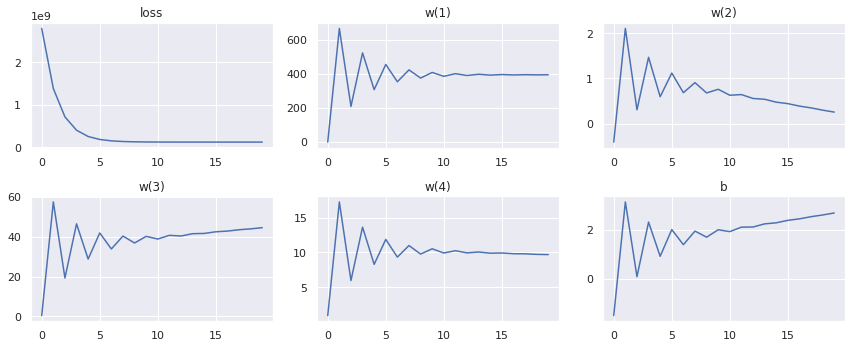

In [77]:
plt.figure(figsize=(12,5))
plt.subplot(2,3,1)
plt.plot(loss_list)
plt.title('loss')

for i in range(4):
  plt.subplot(2,3,i+2)
  plt.plot(w_list[:,i])
  plt.title('w(%d)'%(i+1))

plt.subplot(2,3,6)
plt.plot(b_list)
plt.title('b')

plt.tight_layout()
plt.show()

In [78]:
house_price["Predicted"] = np.round(predict(x,w,b),0).astype('int')
house_price["Error"] = np.round(predict(x,w,b) - y,0).astype('int')

house_price

,Size,School Distance(km),Old(year),Room,Bathroom,Price,Predicted,Error
0,76,0.732,20,3,1,37000,30933,-6067
1,108,0.732,20,3,2,47000,43566,-3434
2,172,0.732,20,4,2,55000,68837,13837
3,150,0.544,9,4,2,52000,59658,7658
4,160,0.544,9,4,2,58500,63605,5105
5,184,0.544,9,4,3,55500,73080,17580
6,75,0.541,9,3,1,36000,30043,-5957
7,101,0.541,9,3,2,40000,40308,308
8,20,0.100,7,1,1,12000,8224,-3776
9,23,0.100,7,1,1,14000,9409,-4591
